# Analysis of music data for the years 1921 to 2020

# Content


The "data.csv" file contains more than 160.000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the data section.
More on Spotify audio features, click here
More on other Spotify track features, click here

Primary:
- id (Id of track generated by Spotify)
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_predict
#from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from jupyterthemes import jtplot
import chart_studio
import pandas as pd
from langdetect import detect
import pycountry
import polyglot
from polyglot.detect import Detector
import re

jtplot.style(theme='onedork')

# Working plan for the blog 
    

1. Reorganized the whole dataframe 
2. Identify all the Chinese artists and titles 
3. Replace modes by characters
4. 

In [5]:
import time 

In [84]:
Chinese_eng = """忘了有多久再没听到你 对我说你 最爱的故事 我想了很久 我开始慌了 是不是我又做错了什么 你哭着对我说 童话里都是骗人的 I forgot how long it's been
Since I last heard you Tell me your favorite story
I have thought for a long time
I'm starting to panic
Wondering if I've done something wrong again
"""

for language in Detector(Chinese_eng).languages:
  print(language)

name: engelska    code: en       confidence:  51.0 read bytes:  1093
name: kinesiska   code: zh       confidence:  48.0 read bytes:  1937
name: un          code: un       confidence:   0.0 read bytes:     0


# Main dataset 

In [210]:
Spotify = pd.read_csv(r"C:/Users/SDEGOSSONDEVARENNE/repos/SpotifyBlog/ToySpotify/Spotify/data.csv")

In [112]:
Spotify_feature_list = list(Spotify)

In [211]:
Spotify = pd.read_csv(r"C:/Users/SDEGOSSONDEVARENNE/repos/SpotifyBlog/ToySpotify/Spotify/data.csv")

Spotify['artists'] = Spotify['artists'].map(lambda x: x.lstrip("\'\[").rstrip("\'\]"))
Spotify['artists'] = Spotify['artists'].str.replace(r"\', \'", ",")

Spotify = Spotify.rename(columns = {'name':'Title'})

In [ ]:
import google_trans_new
from google_trans_new import google_translator  
detector = google_translator()  

def try_detect(cell):
    try:
        detected_lang = detector.detect(cell)
    except:
        detected_lang = None
    return detected_lang

Spotify['Title language'] = Spotify['Title'].apply(try_detect)
Spotify['Artist name language'] = Spotify['artists'].apply(try_detect)

In [ ]:
Spotify

In [ ]:
Spotify.to_csv("C:/Users/SDEGOSSONDEVARENNE/repos/SpotifyBlog/ToySpotify/Spotify/Spotify_with_Origin.csv")

In [41]:
#start = time.time()


#def try_detect(cell):
#    try:
#        detected_lang = detect(cell)
#    except:
#        detected_lang = None
#    return detected_lang

#Spotify['Artist language'] = Spotify['artists'].apply(try_detect)
#Spotify['Artist language']  = Spotify['Artist language'].str.upper() 


#Spotify['Title language'] = Spotify['Title'].apply(try_detect)
#Spotify['Title language']  = Spotify['Title language'].str.upper() 


#end = time.time()

#print(end - start)

76794.35596680641


In [2]:
#76794/60/60

21.331666666666667

In [42]:
#Spotify['Title language']  = Spotify['Title language'].str.upper() 

In [48]:
#Spotify.to_csv("C:\\Users\\k_sego\\repos\\TOY_jptNB\\Spotify\\SpotifyWithLanguage_iso.csv", sep = ";",encoding='utf-8')

In [49]:
#Spotify_w_l= pd.read_csv("C:\\Users\\k_sego\\repos\\TOY_jptNB\\Spotify\\SpotifyWithLanguage_iso.csv", sep = ";",encoding='utf-8')

In [50]:
#Artist_Languages = Spotify_w_l['Artist language'].unique()
#LANGA = []
#for lang in Artist_Languages:
#    try:
#        Lang = pycountry.languages.get(alpha_2=lang).name
#    except:
#        Lang = None
#    LANGA.append(Lang)
#    
#Title_Languages = Spotify_w_l['Title language'].unique()
#LANGT = []
#for lang in Title_Languages:
#    try:
#        Lang = pycountry.languages.get(alpha_2=lang).name
#    except:
#        Lang = None
#    LANGT.append(Lang)

In [51]:
#d1 = {'Artist_Language':Artist_Languages, 'Artist_Language_name':LANGA}
#ART_LANGUAGE_NAMES = pd.DataFrame(d1)
#ART_LANGUAGE_NAMES['Artist_Language_name'] = np.where(ART_LANGUAGE_NAMES['Artist_Language'] == 'ZH-CN', 'Chinese', ART_LANGUAGE_NAMES['Artist_Language_name'])


In [52]:
#d2 = {'Title_Language':Title_Languages, 'Title_Language_name':LANGT}
#TITLE_LANGUAGE_NAMES = pd.DataFrame(d2)
#TITLE_LANGUAGE_NAMES['Title_Language_name'] = np.where(TITLE_LANGUAGE_NAMES['Title_Language'] == 'ZH-CN', 'Chinese', TITLE_LANGUAGE_NAMES['Title_Language_name'])


In [70]:
#Spotify_w_l

In [55]:
#Spotify_check = Spotify_w_l[Spotify_w_l['artists'].str.contains('Jay Chou')]

In [56]:
#Spotify_check['Title'].unique()

array(['黑色幽默', '愛在西元前', '回到過去', '最長的電影', '半島鐵盒', '園遊會', '髮如雪', '聽媽媽的話',
       '以父之名', '退後', '彩虹', '東風破', '藉口', '千里之外', '我不配', '蒲公英的約定', '屋頂',
       '暗號', '不能說的秘密', '給我一首歌的時間', '軌跡', '妳聽得到', '黑色毛衣', '菊花台', '告白氣球',
       '世界末日', '上海一九四三', '她的睫毛', '止戰之殤', '外婆', '伊斯坦堡', '分裂', '最後的戰役',
       '斷了的弦', 'Mojito', '晴天', '安靜', '七里香', '擱淺', '龍捲風', '簡單愛', '一路向北',
       '珊瑚海', '星晴', '可愛女人', '夜曲', '青花瓷', '稻香', '開不了口', '楓', '說好的幸福呢'],
      dtype=object)

In [71]:
#Spotify_check


In [72]:
#Spotify_check

In [73]:
#Chinese_artists = ['Zhang', 'Zhen', 'Li', 'Lee', 'Cai', 'Tsai', 'Jay Chou', 'Tao', 'Wong','Chung','Leehom', 'Yue','ling', 'long','Chen', 'Chow','zongsheng','David Tao']

In [74]:
#Spotify_ext = Spotify_w_l.merge(LANGUAGE_NAMES, right_on = 'Language', left_on = 'language', how ='left')

In [75]:
#Spotify_ext.to_csv("C:\\Users\\k_sego\\repos\\TOY_jptNB\\Spotify\\DataWithLanguages.csv", sep = ";",encoding='utf-8')

In [ ]:

Spotify_w_genre['artists'] = Spotify_w_genre['artists'].map(lambda x: x.lstrip("\'\[").rstrip("\'\]"))
Spotify_w_genre['artists'] = Spotify_w_genre['artists'].str.replace(r"\', \'", ",")

In [76]:
Spotify = pd.read_csv(r"C:/Users/SDEGOSSONDEVARENNE/repos/SpotifyBlog/ToySpotify/Spotify/DataWithLanguages.csv", sep = ";")

In [77]:
Spotify[Spotify['artists'].str.contains("Jay Chou")]

,Unnamed: 0,Unnamed: 0.1,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,name,popularity,release_date,speechiness,tempo,valence,year,language,Language,Language_name
6141,6141,6141,0.40600,Jay Chou,0.603,280493,0.292,0,1lHR2yz3Dl8U0fNJjpFuge,0.000000,...,黑色幽默,50,2000-11-06,0.0282,127.905,0.231,2000,EN,EN,English
6204,6204,6204,0.17900,Jay Chou,0.769,234253,0.680,0,36okEwTBuhG9dIOqCd0B2P,0.000027,...,愛在西元前,50,2001-09-14,0.0339,126.815,0.727,2001,EN,EN,English
6314,6314,6314,0.84200,Jay Chou,0.520,231467,0.459,0,7aGklaoRXNcuufJQGsly0X,0.000000,...,回到過去,51,2002-07-30,0.0295,170.154,0.187,2002,EN,EN,English
6892,6892,6892,0.19000,Jay Chou,0.533,235840,0.359,0,6C9w3NKP7yKqGLBP09iEL4,0.000000,...,最長的電影,57,2008-03-10,0.0314,120.858,0.165,2008,EN,EN,English
14344,14344,14344,0.43200,Jay Chou,0.784,317400,0.439,0,4XjGz4IxIJ6tYk9tDIid8w,0.000005,...,半島鐵盒,49,2002-07-30,0.0357,129.981,0.491,2002,EN,EN,English
14587,14587,14587,0.14100,Jay Chou,0.656,251573,0.677,0,2ZlUyEiq09jls3eyk6mjau,0.001530,...,園遊會,50,2004-08-03,0.0301,122.026,0.608,2004,EN,EN,English
14644,14644,14644,0.56500,Jay Chou,0.714,299627,0.700,0,1jEAOrekJF0h2Rvf6mpCLd,0.000002,...,髮如雪,53,2005-11-01,0.0517,116.051,0.352,2005,EN,EN,English
14762,14762,14762,0.39100,Jay Chou,0.719,263973,0.640,0,0TDnUtKMOJruB90aDEMsDR,0.000065,...,聽媽媽的話,53,2006-09-05,0.0287,92.989,0.595,2006,EN,EN,English
22499,22499,22499,0.29800,Jay Chou,0.432,342000,0.564,0,1zxThQ8TWAQOOSn2isGPk0,0.233000,...,以父之名,48,2003-07-31,0.0407,174.960,0.398,2003,EN,EN,English
22802,22802,22802,0.40600,Jay Chou,0.661,260200,0.572,0,1xYPMWVdl2yqOkQpjWPVbU,0.000000,...,退後,54,2006-09-05,0.0246,131.954,0.186,2006,EN,EN,English


In [103]:
listed_chinese = 

SyntaxError: invalid syntax (<ipython-input-103-ca48f0b73116>, line 1)

In [80]:
import pandas
print(pandas.__path__)

['C:\\Users\\SDEGOSSONDEVARENNE\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\pandas']


In [156]:
columns = ['id', 'name', 'artists', 'release_date', 'year']
for col in columns:
  print(f'{col:<15}: {Spotify[col].nunique()} unique values')
Spotify = Spotify.drop(labels=['id', 'name', 'release_date'], axis=1)
#Spotify.shape

id             : 169909 unique values
name           : 132940 unique values
artists        : 33375 unique values
release_date   : 10882 unique values
year           : 100 unique values
Language_name  : 39 unique values


In [160]:
SPOTIFY_CH = Spotify[Spotify['Language_name']=='Chinese']

In [161]:
SPOTIFY_CH['artists'].unique()

array(['白光', '于璇', '鈴木 弘', '潘安邦', '康丁', '席蓉蓉', '左艷蓉', '冉肖玲', '鄒森', '黑豹',
       '那英', '福居良'], dtype=object)

In [4]:
Spotify = Spotify.drop_duplicates()

In [5]:
numeric_columns = Spotify.columns[Spotify.dtypes != 'object']
string_columns = Spotify.columns[Spotify.dtypes == 'object']
print(f'There are {len(numeric_columns)} numeric columns & {len(string_columns)} string columns')

There are 15 numeric columns & 1 string columns


In [7]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
print('Feature correlated to popularity by correlation factor:')
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

Feature correlated to popularity by correlation factor:
year              -->  0.88 (abs)
acousticness      -->  0.59 (abs)
energy            -->  0.49 (abs)
loudness          -->  0.46 (abs)
instrumentalness  -->  0.30 (abs)
danceability      -->  0.22 (abs)
explicit          -->  0.21 (abs)


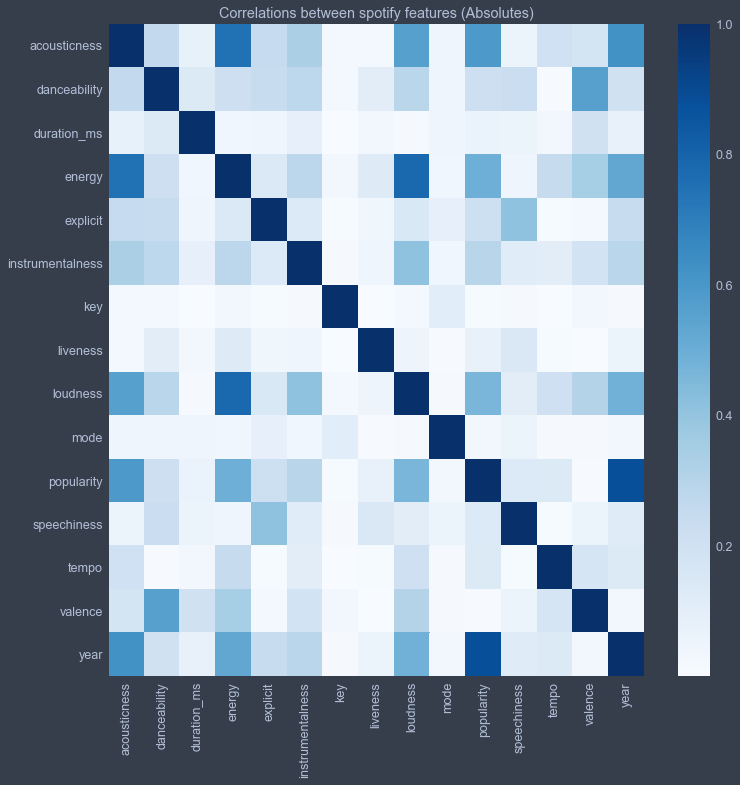

In [6]:
Spotify = pd.DataFrame(data=Spotify, columns=numeric_columns, index=Spotify.index)
corr = np.abs(Spotify.corr())
fig, ax = plt.subplots(figsize=(12, 12))
#cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap="Blues", square=False)
plt.title('Correlations between spotify features (Absolutes)')
plt.show()

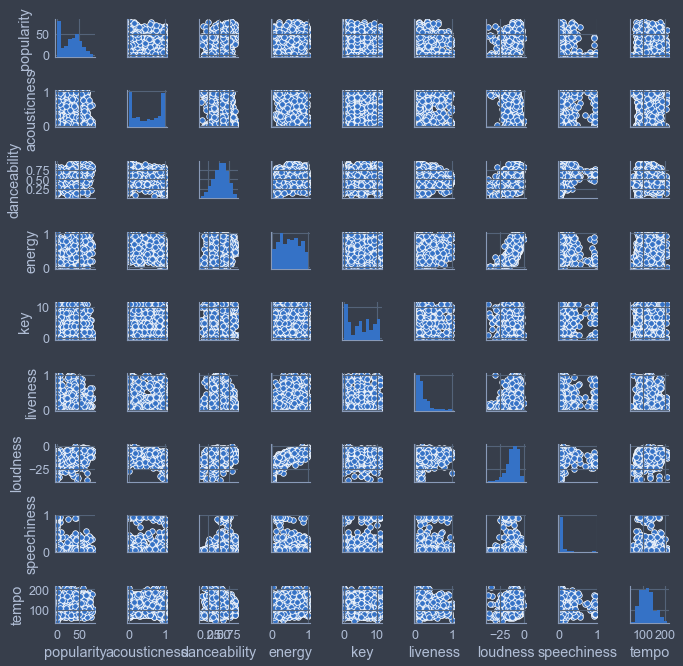

In [8]:

sns_plot = sns.pairplot(Spotify.sample(1000), height=1, vars=['popularity', 'acousticness', 'danceability', 'energy',
                                                              'key', 'liveness', 'loudness', 'speechiness', 'tempo'])
for sns_plot in sns_plot.axes.flat[:2]:
    sns_plot.tick_params(axis='x', labelrotation=90)
plt.show()

### 50 most popular artists in the Spotify dataset

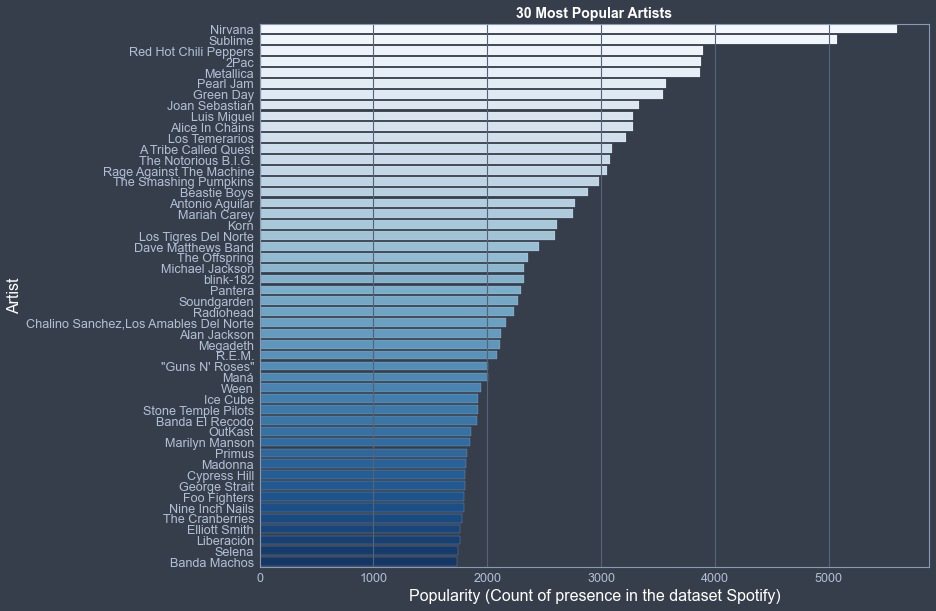

In [9]:
Spotify = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data.csv")
Spotify = Spotify.drop(['explicit','id','mode'],axis = 1)
Spotify['artists'] = Spotify['artists'].map(lambda x: x.lstrip("\'\[").rstrip("\'\]"))
Spotify['artists'] = Spotify['artists'].str.replace(r"\', \'", ",")

Spotify_2000 = Spotify.loc[Spotify['year'] >= 2000]
Spotify_1990s = Spotify.loc[(Spotify['year'] >= 1990) & (Spotify['year'] < 2000) ]
Spotify_1980s = Spotify.loc[(Spotify['year'] >= 1980) & (Spotify['year'] < 1990) ]

fig, ax1 = plt.subplots(figsize = (12, 10))
lead_artists = Spotify_1990s.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(50)
ax1 = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='white', ax=ax1)
ax1.set_xlabel('Popularity (Count of presence in the dataset Spotify)', c='w', fontsize=16)
ax1.set_ylabel('Artist', c='w', fontsize=16)
ax1.set_title('30 Most Popular Artists', c='w', fontsize=14, weight = 'bold')
plt.show()

### 50 most popular artists in the Spotify dataset after 2000

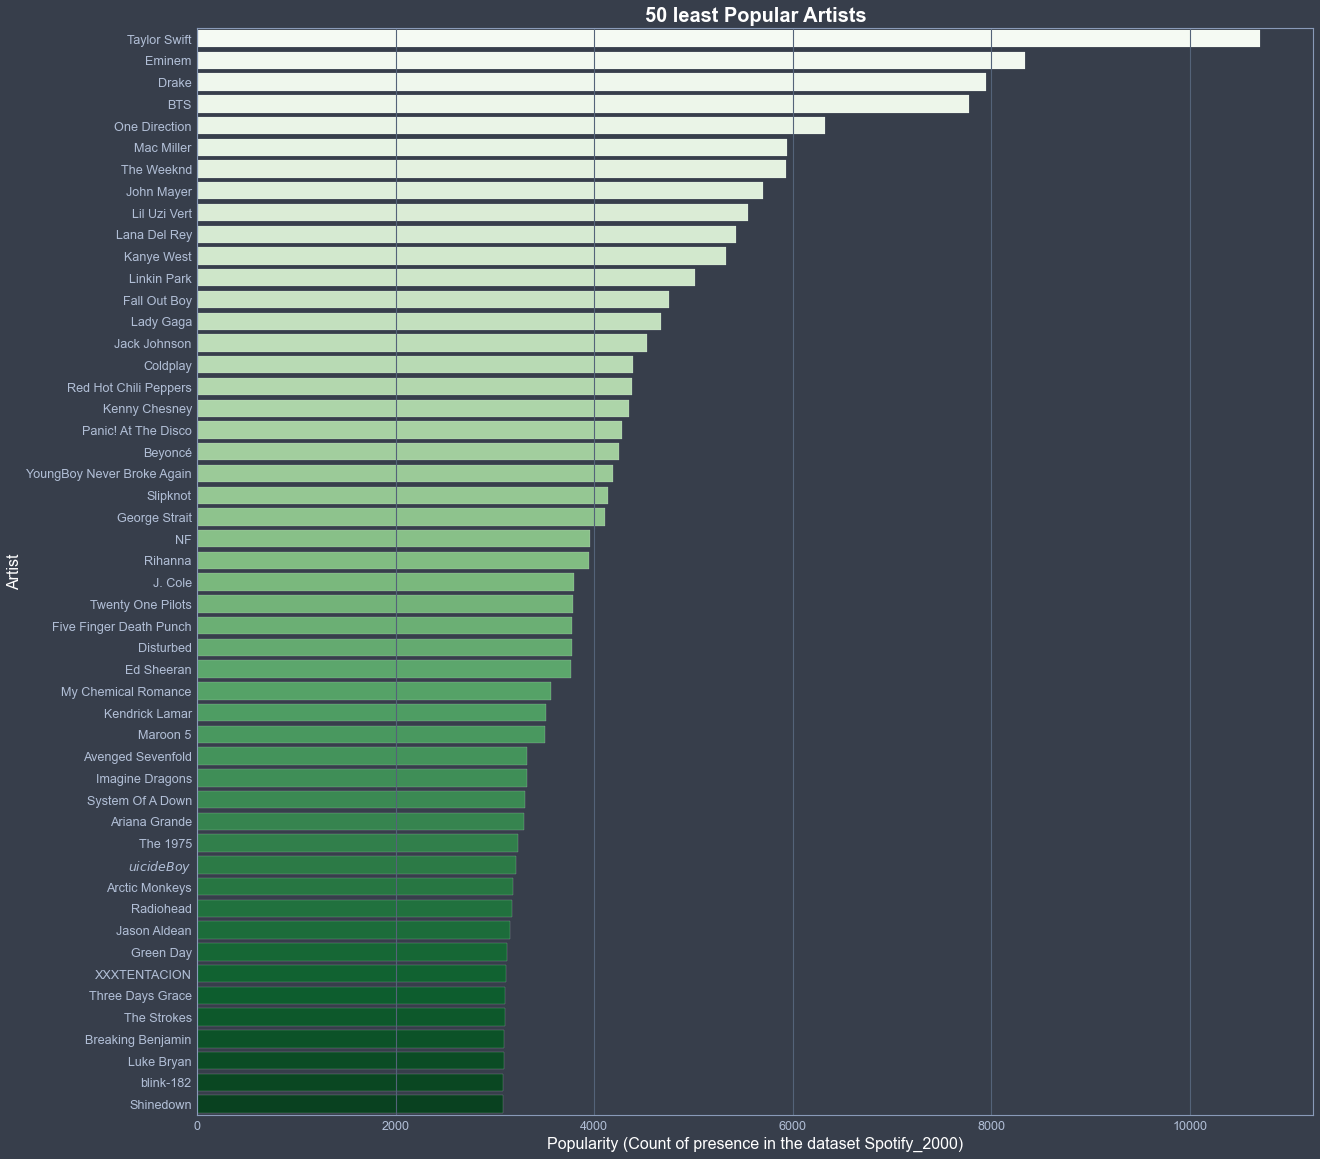

In [10]:
fig, ax2 = plt.subplots(figsize = (20, 20))
lead_artists = Spotify_2000.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(50)
ax2 = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Greens", orient="h", edgecolor='white', ax=ax2)
ax2.set_xlabel('Popularity (Count of presence in the dataset Spotify_2000)', c='w', fontsize=16)
ax2.set_ylabel('Artist', c='w', fontsize=16)
ax2.set_title('50 least Popular Artists', c='w', fontsize=20, weight = 'bold')
plt.show()

In [11]:
list(Spotify)

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'valence',
 'year']

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

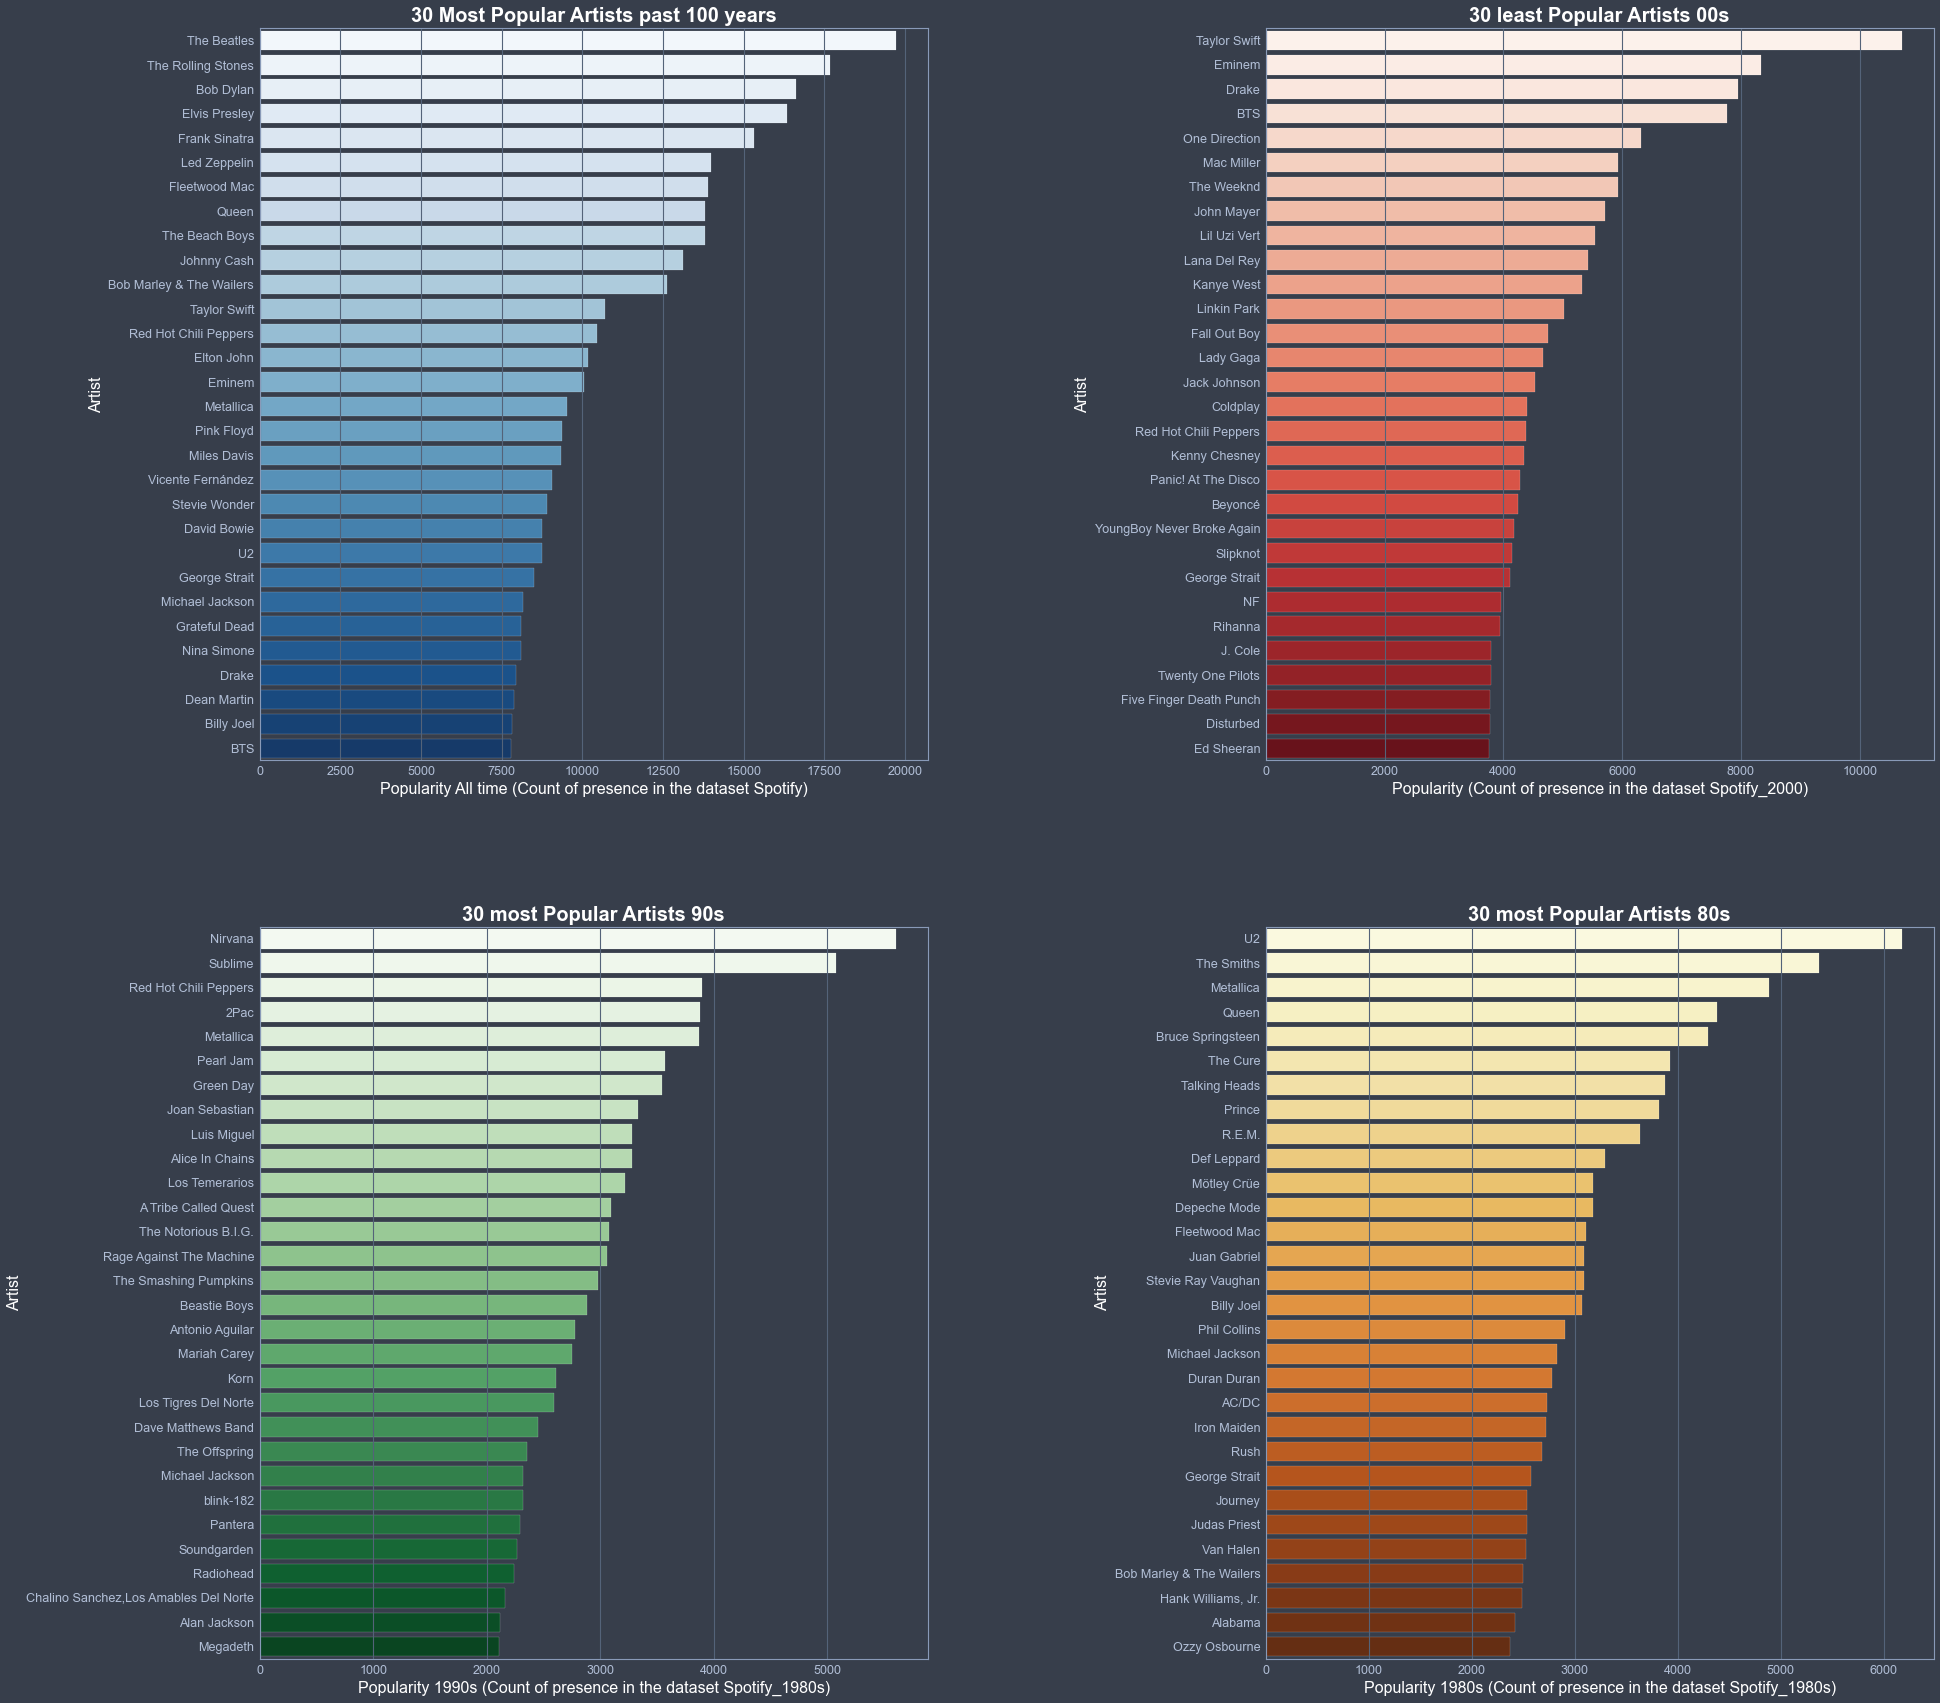

In [13]:
#fig, ax2 = plt.subplots(figsize = (20, 20))
fig1 = plt.figure(figsize=[30,30])
gs  = gridspec.GridSpec(100,100)

ax1 = fig1.add_subplot(gs[0:45,0:40])
ax2 = fig1.add_subplot(gs[0:45,60:100])
ax3 = fig1.add_subplot(gs[55:100,0:40])
ax4 = fig1.add_subplot(gs[55:100,60:100])

lead_artists1 = Spotify.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(30)
ax1 = sns.barplot(x=lead_artists1.values, y=lead_artists1.index, palette="Blues", orient="h", edgecolor='white', ax=ax1)
ax1.set_xlabel('Popularity All time (Count of presence in the dataset Spotify)', c='w', fontsize=16)
ax1.set_ylabel('Artist', c='w', fontsize=16)
ax1.set_title('30 Most Popular Artists past 100 years', c='w', fontsize=20, weight = 'bold')


lead_artists2 = Spotify_2000.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(30)
ax2 = sns.barplot(x=lead_artists2.values, y=lead_artists2.index, palette="Reds", orient="h", edgecolor='white', ax=ax2)
ax2.set_xlabel('Popularity (Count of presence in the dataset Spotify_2000)', c='w', fontsize=16)
ax2.set_ylabel('Artist', c='w', fontsize=16)
ax2.set_title('30 least Popular Artists 00s', c='w', fontsize=20, weight = 'bold')


lead_artists3 = Spotify_1990s.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(30)
ax3 = sns.barplot(x=lead_artists3.values, y=lead_artists3.index, palette="Greens", orient="h", edgecolor='white', ax=ax3)
ax3.set_xlabel('Popularity 1990s (Count of presence in the dataset Spotify_1980s)', c='w', fontsize=16)
ax3.set_ylabel('Artist', c='w', fontsize=16)
ax3.set_title('30 most Popular Artists 90s', c='w', fontsize=20, weight = 'bold')

lead_artists4 = Spotify_1980s.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(30)
ax4 = sns.barplot(x=lead_artists4.values, y=lead_artists4.index, palette="YlOrBr", orient="h", edgecolor='white', ax=ax4)
ax4.set_xlabel('Popularity 1980s (Count of presence in the dataset Spotify_1980s)', c='w', fontsize=16)
ax4.set_ylabel('Artist', c='w', fontsize=16)
ax4.set_title('30 most Popular Artists 80s', c='w', fontsize=20, weight = 'bold')

fig1.savefig('C:/Users/k_sego/repos/TOY_jptNB/Graphs/Popularity.png')
plt.show()

Lets do the same but in an interactive plot where decades can be picked

#### Groupping the data by decades 

In [14]:
Spotify['Song Decade'] = None
Spotify.loc[(Spotify['year'] >= 1920) & (Spotify['year'] < 1930), 'Song Decade'] = 1920
Spotify.loc[(Spotify['year'] >= 1930) & (Spotify['year'] < 1940), 'Song Decade'] = 1930
Spotify.loc[(Spotify['year'] >= 1940) & (Spotify['year'] < 1950), 'Song Decade'] = 1940
Spotify.loc[(Spotify['year'] >= 1950) & (Spotify['year'] < 1960), 'Song Decade'] = 1950
Spotify.loc[(Spotify['year'] >= 1960) & (Spotify['year'] < 1970), 'Song Decade'] = 1960
Spotify.loc[(Spotify['year'] >= 1970) & (Spotify['year'] < 1980) , 'Song Decade'] = 1970
Spotify.loc[(Spotify['year'] >= 1980) & (Spotify['year'] < 1990) , 'Song Decade'] = 1980
Spotify.loc[(Spotify['year'] >= 1990) & (Spotify['year'] < 2000) , 'Song Decade'] = 1990
Spotify.loc[(Spotify['year'] >= 2000) & (Spotify['year'] < 2010) , 'Song Decade'] = 2000
Spotify.loc[(Spotify['year'] >= 2010) & (Spotify['year'] < 2020) , 'Song Decade'] = 2010
Spotify.loc[(Spotify['year'] >= 2020) & (Spotify['year'] < 2030) , 'Song Decade'] = 2020

Spotify

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,year,Song Decade
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0.563000,10,0.1510,-12.428,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,1920
1,0.9940,"Robert Schumann,Vladimir Horowitz",0.379,282133,0.0135,0.901000,8,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,1920
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0.000000,5,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1920
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0.887000,1,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,1920
4,0.9900,"Frédéric Chopin,Vladimir Horowitz",0.210,687733,0.2040,0.908000,11,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"DripReport,Tyga",0.875,163800,0.4430,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,2020
169905,0.0167,"Leon Bridges,Terrace Martin",0.719,167468,0.3850,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,2020
169906,0.5380,"Kygo,Oh Wonder",0.514,180700,0.5390,0.002330,7,0.1080,-9.332,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,2020
169907,0.0714,"Cash Cash,Andy Grammer",0.646,167308,0.7610,0.000000,1,0.2220,-2.557,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,2020


In [15]:
DecadeAverages = Spotify[['danceability','energy','liveness','acousticness', 'valence','Song Decade','speechiness']].groupby('Song Decade').mean().sort_values(by='Song Decade').reset_index()
DecadeAverages

,Song Decade,danceability,energy,liveness,acousticness,valence,speechiness
0,1920,0.577000,0.240642,0.211040,0.830644,0.566615,0.232202
1,1930,0.536202,0.288124,0.225324,0.875116,0.576027,0.168054
2,1940,0.471628,0.253416,0.220914,0.870705,0.485126,0.147308
3,1950,0.477069,0.287032,0.209646,0.840150,0.476691,0.096838
4,1960,0.496651,0.415796,0.209356,0.621166,0.556918,0.058818
5,1970,0.526920,0.538544,0.220959,0.392206,0.587902,0.060665
6,1980,0.549658,0.602475,0.205267,0.286104,0.570081,0.062925
7,1990,0.571790,0.594565,0.199208,0.292137,0.549937,0.082740
8,2000,0.576234,0.658571,0.195840,0.258534,0.533421,0.087697
9,2010,0.599045,0.632784,0.189187,0.256207,0.461508,0.100972


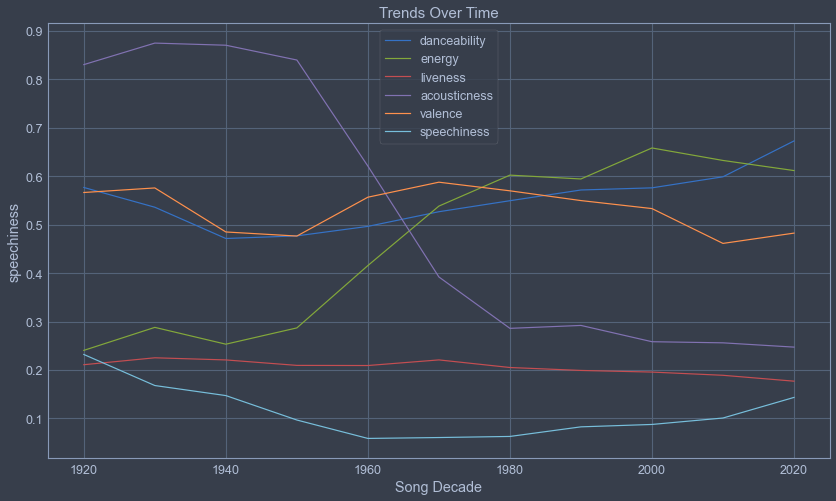

In [16]:
plt.figure(figsize=(14,8))
plt.title("Trends Over Time", fontsize=15)
lines = ['danceability','energy','liveness','acousticness', 'valence','speechiness']
for line in lines:
    ax = sns.lineplot(x='Song Decade', y=line, data=DecadeAverages)
plt.legend(lines)

In [17]:
DecadeAverages_melted = DecadeAverages.melt(id_vars='Song Decade')
DecadeAverages_melted

,Song Decade,variable,value
0,1920,danceability,0.577000
1,1930,danceability,0.536202
2,1940,danceability,0.471628
3,1950,danceability,0.477069
4,1960,danceability,0.496651
...,...,...,...
61,1980,speechiness,0.062925
62,1990,speechiness,0.082740
63,2000,speechiness,0.087697
64,2010,speechiness,0.100972


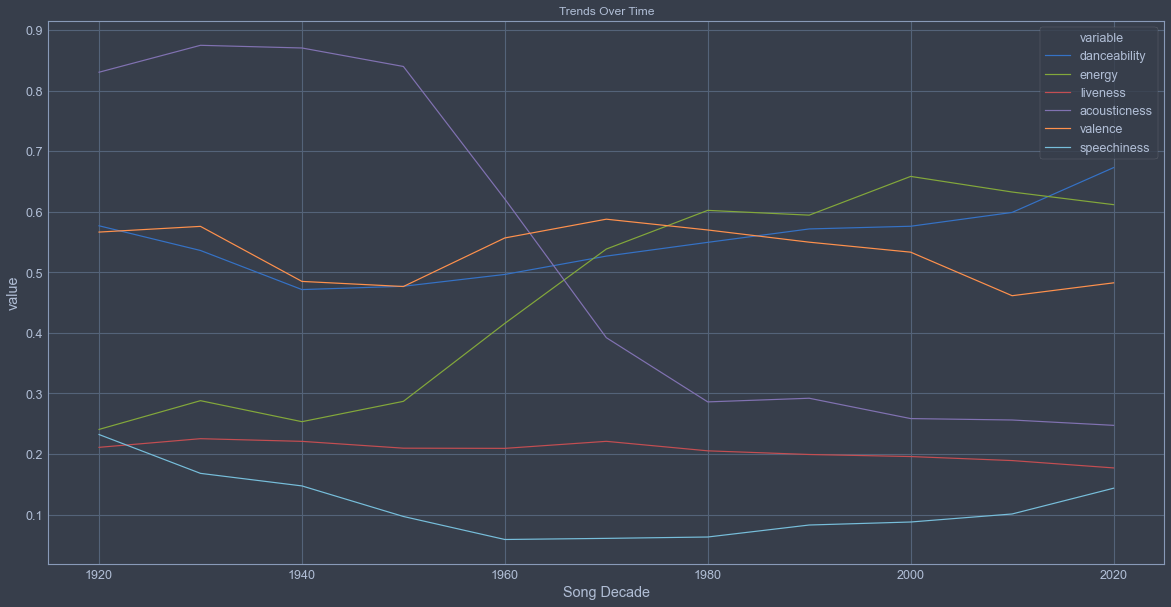

In [18]:
plt.figure(figsize=(20,10))
plt.title("Trends Over Time", fontsize=12)
sns.lineplot(x='Song Decade', y='value', hue='variable', data=DecadeAverages_melted)

In [19]:
Spotify.artists.value_counts()[:40]
Spotify['popularity'].mean()
artists = Spotify.artists.value_counts().index[:40]


In [20]:
Spotify

,acousticness,artists,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,year,Song Decade
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0.563000,10,0.1510,-12.428,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,1920
1,0.9940,"Robert Schumann,Vladimir Horowitz",0.379,282133,0.0135,0.901000,8,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,1920
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0.000000,5,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,1920
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0.887000,1,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,1920
4,0.9900,"Frédéric Chopin,Vladimir Horowitz",0.210,687733,0.2040,0.908000,11,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"DripReport,Tyga",0.875,163800,0.4430,0.000032,1,0.0891,-7.461,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,2020
169905,0.0167,"Leon Bridges,Terrace Martin",0.719,167468,0.3850,0.031300,8,0.1110,-10.907,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,2020
169906,0.5380,"Kygo,Oh Wonder",0.514,180700,0.5390,0.002330,7,0.1080,-9.332,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,2020
169907,0.0714,"Cash Cash,Andy Grammer",0.646,167308,0.7610,0.000000,1,0.2220,-2.557,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,2020


In [21]:
Spotify_artists = Spotify[Spotify.artists.isin(artists)][['artists','Song Decade','energy']].groupby(['artists','Song Decade']).count().reset_index()
Spotify_artists.rename(columns={'energy':'count'}, inplace=True)
Spotify_artists.head()

,artists,Song Decade,count
0,Aretha Franklin,1920,1
1,Aretha Franklin,1930,1
2,Aretha Franklin,1950,9
3,Aretha Franklin,1960,110
4,Aretha Franklin,1970,60


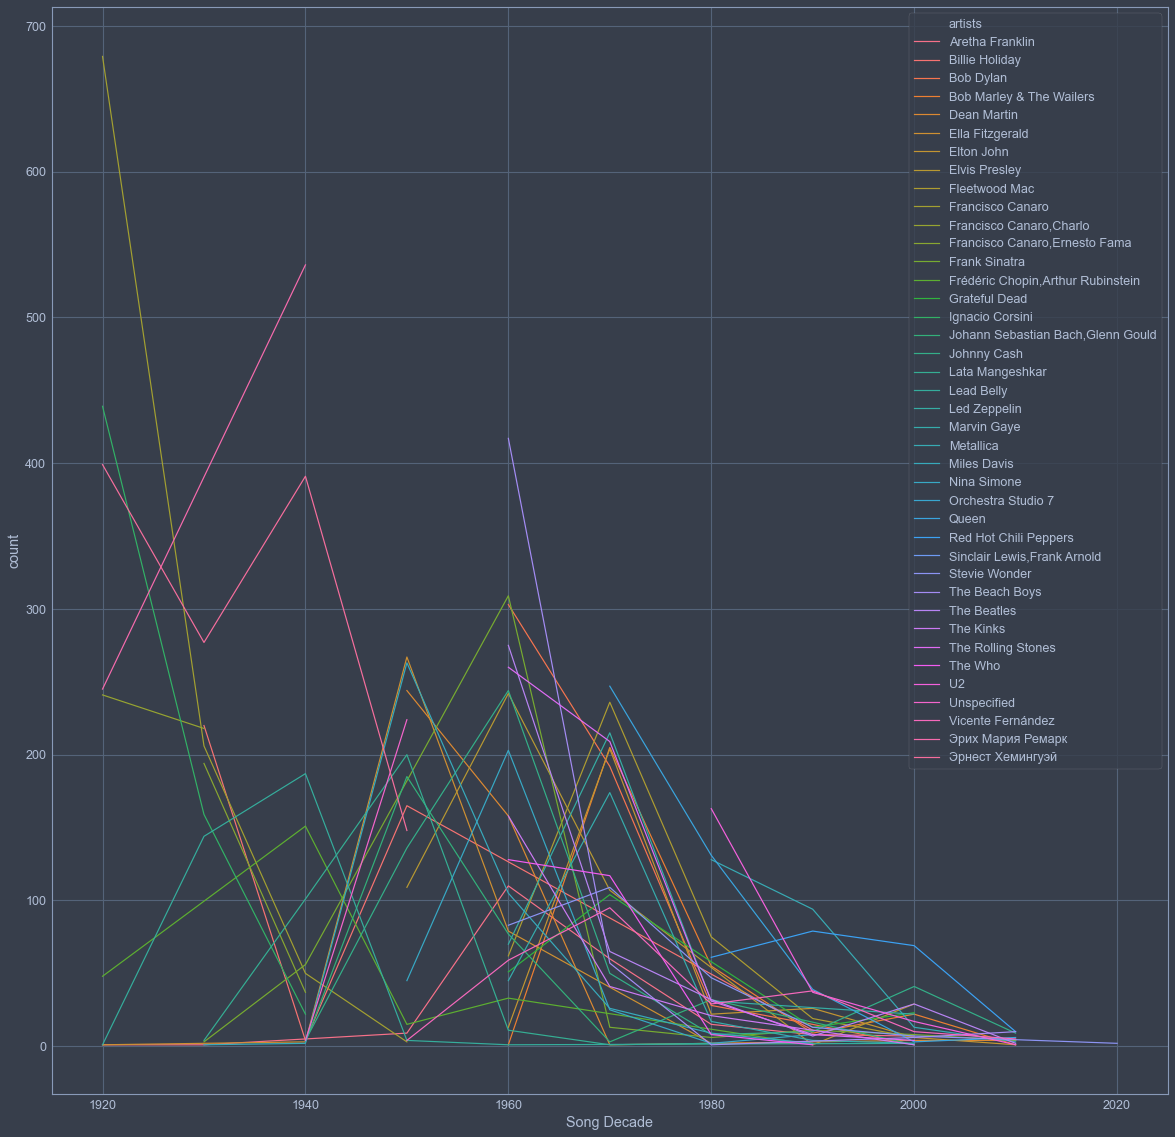

In [22]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Song Decade', y='count', hue='artists', data=Spotify_artists)

In [23]:
Shaped_Spotify = pd.DataFrame(np.zeros((10,40)), columns=artists)
Shaped_Spotify['Song Decade'] = np.arange(1920,2020,10)
print(Shaped_Spotify.shape)
Shaped_Spotify = Shaped_Spotify.melt(id_vars='Song Decade',var_name='artists', value_name='count')
print(Shaped_Spotify.shape)
Shaped_Spotify.head()


(10, 41)
(400, 3)


,Song Decade,artists,count
0,1920,Эрнест Хемингуэй,0.0
1,1930,Эрнест Хемингуэй,0.0
2,1940,Эрнест Хемингуэй,0.0
3,1950,Эрнест Хемингуэй,0.0
4,1960,Эрнест Хемингуэй,0.0


In [24]:
MergedSpotify = pd.merge(Shaped_Spotify, Spotify_artists, on=['Song Decade','artists'], how='outer').sort_values(by='Song Decade').reset_index(drop=True)
MergedSpotify.head()

,Song Decade,artists,count_x,count_y
0,1920,Эрнест Хемингуэй,0.0,399.0
1,1920,Led Zeppelin,0.0,NaN
2,1920,Lead Belly,0.0,1.0
3,1920,Ella Fitzgerald,0.0,1.0
4,1920,Fleetwood Mac,0.0,NaN


In [25]:
MergedSpotify.fillna(0, inplace=True)
MergedSpotify.drop('count_x', axis=1, inplace=True)
MergedSpotify.rename(columns={'count_y':'count'}, inplace=True)
MergedSpotify['cumsum'] = MergedSpotify[['count','artists']].groupby('artists').cumsum()
MergedSpotify.head(10)

,Song Decade,artists,count,cumsum
0,1920,Эрнест Хемингуэй,399.0,399.0
1,1920,Led Zeppelin,0.0,0.0
2,1920,Lead Belly,1.0,1.0
3,1920,Ella Fitzgerald,1.0,1.0
4,1920,Fleetwood Mac,0.0,0.0
5,1920,Billie Holiday,0.0,0.0
6,1920,Miles Davis,0.0,0.0
7,1920,"Johann Sebastian Bach,Glenn Gould",0.0,0.0
8,1920,The Beatles,0.0,0.0
9,1920,Queen,0.0,0.0


In [31]:
import plotly.express as px
fig = px.bar(MergedSpotify,
             x='artists', y='cumsum',
             color='artists',
             #width=1200, height=1200,
             animation_frame='Song Decade', animation_group='Song Decade',
             range_y=[0,1000],
             title='40 artists with Most Songs in the Spotify 1920-2020 dataset')
fig.update_layout(margin=dict(l=20, r=20, t=40, b=300),paper_bgcolor="black")
fig['layout']['updatemenus'][0]['pad']=dict(r=20, t= 250)
fig['layout']['sliders'][0]['pad']=dict(r= 10, t=250,)
fig.show()

In [37]:
import chart_studio
import pandas as pd
from langdetect import detect
import re

In [ ]:
Spotify

The step now is to create an app using ipyWidgets

In [28]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [29]:
Years = Subset_spotify_full['year'].unique()
#Artist = Subset_spotify_full['artists'].unique()
min_year  = min(Years)
max_year = max(Years)

NameError: name 'Subset_spotify_full' is not defined

### evolution of genre popularity over time

In [ ]:
#Spotify = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data.csv")
df_2 = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data_w_genres.csv")
df = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data_by_genres.csv")

from tqdm.notebook import tqdm

def str2list(x):
    try:
        return ast.literal_eval(x)
    except:
        return np.nan

In [ ]:
out_cols = ["genres", "artists", "mode", "count", "key"]
in_cols = [x for x in df.columns if x not in out_cols] 

df = df.set_index("genres")[in_cols].drop("[]", 0)
df #genre data

#fill nan values by 0
df_2.set_index("artists", inplace=True)
#dfmi.loc[:, ('one', 'second')]
df_2["genres"][df_2["genres"] == "[]"] = np.nan
#df_2["genres"][df_2["genres"] == "[]"] = np.nan
df_2["genres"] = df_2["genres"].fillna(0)
df_2



In [ ]:
df_2

In [ ]:


#standardize data
df_2_std = df_2.copy()
for col in in_cols:
    df_2_std[col] = (df_2[col]-df_2[col].mean())/df_2[col].std()
       

In [ ]:
df_2_std

In [ ]:

#extract individual genres from genre lists
df_2_std.reset_index(inplace = True)
collist = list(df_2_std.columns)
new_rows = []
for index in tqdm(range(len(df_2_std))):
    row = df_2_std.iloc[index]
    genre_list = str2list(row["genres"])
    row = pd.DataFrame(row).transpose()
    if(not(isinstance(genre_list, list) and len(genre_list) != 0)):
        pass
    else:
        if(len(genre_list) == 1):
            row["genres"] = genre_list[0]
            new_rows.append(list(row.values[0]))
        else:
            row = pd.concat([row for i in range(len(genre_list))], 0)
            row["genres"] = genre_list
            for i in range(len(genre_list)):
                new_rows.append(list(row.values[i]))
                
df_known = pd.DataFrame(new_rows, columns = collist)
#export

df_known.to_csv("data_each_genres.csv")
print(df_known)

In [ ]:
#fill nan values by 0
SPotify_genre.set_index("artists", inplace=True)
SPotify_genre["genres"][SPotify_genre["genres"] == "[]"] = np.nan
SPotify_genre["genres"] = SPotify_genre["genres"].fillna(0)
SPotify_genre


#standardize data
df_2_std = df_2.copy()
for col in in_cols:
    df_2_std[col] = (df_2[col]-df_2[col].mean())/df_2[col].std()
       
#extract individual genres from genre lists
df_2_std.reset_index(inplace = True)
collist = list(df_2_std.columns)
new_rows = []
for index in tqdm(range(len(df_2_std))):
    row = df_2_std.iloc[index]
    genre_list = str2list(row["genres"])
    row = pd.DataFrame(row).transpose()
    if(not(isinstance(genre_list, list) and len(genre_list) != 0)):
        pass
    else:
        if(len(genre_list) == 1):
            row["genres"] = genre_list[0]
            new_rows.append(list(row.values[0]))
        else:
            row = pd.concat([row for i in range(len(genre_list))], 0)
            row["genres"] = genre_list
            for i in range(len(genre_list)):
                new_rows.append(list(row.values[i]))
                
df_known = pd.DataFrame(new_rows, columns = collist)

In [ ]:
df_known

In [ ]:
fig, ax = plt.subplots(figsize = (15, 3))
stat = Spotify.groupby('count')['mean'].mean().to_frame().reset_index()
ax = stat.plot(x='count', y='mean', marker='.', linestyle = '', ax=ax)
ax.set_xlabel('Count of appearances in data', fontsize=12, c='r')
ax.set_ylabel('Mean Popularity', fontsize=12, c='r')
plt.show()

## PCA on Spotify

Let's play with a smaller dataset that also includes information on the genre. 

In [ ]:
Spotify_key      = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/spotify2.csv", sep=";", encoding= "iso-8859-1")
numeric_columns  = Spotify_key.columns[Spotify_key.dtypes != 'object']
string_columns   = Spotify_key.columns[Spotify_key.dtypes == 'object']
Spotify_Num      = pd.DataFrame(data=Spotify_key, columns=numeric_columns, index=Spotify_key.index)

In [ ]:
Spotify_Num      = pd.DataFrame(data=Spotify_key, columns=numeric_columns, index=Spotify_key.index)
Spotify_target   = Spotify_key['Top Genre']

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
Spotify_key["Top Genre"] = pd.Categorical(Spotify_key["Top Genre"])
Spotify_key["Top Genre"] = Spotify_key["Top Genre"].cat.codes

In [ ]:

Spotify_genre = Spotify_key.drop(['Index','Length (Duration)', 'Title','Artist','Year',], axis = 1)

In [ ]:
Spotify_genre = normalize(Spotify_genre)

In [ ]:
cols = Spotify_genre.shape[1]
Spotify_genre_data = Spotify_genre.values[:, 0:(cols-1)]
Spotify_genre_category = Spotify_genre.values[:,0]
Spotify_genre_data.astype(float)


In [ ]:
# Number of clusters
k = 12

# Number of training data
n = Spotify_genre_data.shape[0]
# Number of features in the data
c = Spotify_genre_data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(Spotify_genre_data, axis = 0)
std = np.std(Spotify_genre_data, axis = 0)
centers = np.random.randn(k,c)*std + mean


In [ ]:
colors=['orange', 'blue', 'green','red','black', 'yellow']
for i in range(n):
    plt.scatter(Spotify_genre_data[i, 0], Spotify_genre_data[i,1], s=7, color = colors[int(Spotify_genre_category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='w', s=150)

In [ ]:
range(n)

In [ ]:
n

In [ ]:
mylist= list(range(1,322))
test1 = pd.DataFrame({'score': mylist})
from scipy.stats import rankdata
import numpy as numpy

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from ipywidgets import interactive

Spotify_full         = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data.csv")
Spotify_with_genres  = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data_w_genres.csv")
Spotify_by_genre     = pd.read_csv(r"C:/Users/k_sego/repos/TOY_jptNB/Spotify/data_by_genres.csv")

In [ ]:
Spotify_full

In [ ]:
#Spotify_full['Year'] = pd.to_datetime(Spotify_full.year, format='%Y')

In [ ]:
Subset_spotify_full = Spotify_full[['artists','year', 'energy','key','acousticness','popularity']]
Subset_spotify_full['artists'] = Subset_spotify_full['artists'].map(lambda x: x.lstrip("\'\[").rstrip("\'\]"))
Subset_spotify_full['artists'] = Subset_spotify_full['artists'].str.replace(r"\', \'", ",")

In [ ]:
lst_col = 'genres'

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [ ]:
list(Spotify)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
Decades = Spotify['Song Decade'].unique()
#Artist = Subset_spotify_full['artists'].unique()
min_Decades  = min(Decades)
max_Decades = max(Decades)

In [ ]:
max_Decades

In [ ]:
year = widgets.IntSlider(
    value=1960,
    min=min_Decades,
    max=max_Decades,
    step=10,
    description='Decade:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Song Decade: ',
    value=True,
)

container = widgets.HBox(children=[use_date, year])

textbox = widgets.Dropdown(
    description='Popularity:',
    value=5,
    options=Spotify['popularity'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(Spotify['key'].unique()),
    value=5,
    description='Key:',
)


# Assign an empty figure widget with two traces
trace1 = go.Scatter(x=Spotify['energy'], opacity=0.75, name='Energy')
trace2 = go.Scatter(x=Spotify['acousticness'], opacity=0.75, name='Acousticness')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='Spotify Datset'
                        ),
                        barmode='overlay'
                    ))

In [ ]:
def validate():
    if origin.value in Spotify['key'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(Spotify['Song Decade'] == year.value, Spotify['popularity']== textbox.value,
                               Spotify['key']== origin.value)]
            temp_df = Spotify[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(Spotify['popularity']==textbox.value,  Spotify['key'] == origin.value)]
            temp_df = Spotify[filter_list]
        x1 = temp_df['energy']
        x2 = temp_df['acousticness']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Energy'
            g.layout.yaxis.title = 'Value'


origin.observe(response, names="value")
textbox.observe(response, names="value")
year.observe(response, names="value")
use_date.observe(response, names="value")

In [ ]:
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])


